**8xMISSINGxVALUES**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    'GRE Score': [320, 300, 310, 315, None],
    'TOEFL Score': [110, 105, 115, None, 107],
    'University Rating': [4, 3, 3, 4, 2],
    'SOP': [4.5, 3.0, 3.5, None, 2.5],
    'LOR': [4.0, 3.5, 3.0, 3.5, None],
    'CGPA': [9.0, 8.0, 8.5, 9.2, None],
    'Research': [1, 0, 1, 1, 0],
    'Chance of Admit': [0.9, 0.8, 0.85, 0.95, 0.75]
}

In [4]:
print(data)

{'GRE Score': [320, 300, 310, 315, None], 'TOEFL Score': [110, 105, 115, None, 107], 'University Rating': [4, 3, 3, 4, 2], 'SOP': [4.5, 3.0, 3.5, None, 2.5], 'LOR': [4.0, 3.5, 3.0, 3.5, None], 'CGPA': [9.0, 8.0, 8.5, 9.2, None], 'Research': [1, 0, 1, 1, 0], 'Chance of Admit': [0.9, 0.8, 0.85, 0.95, 0.75]}


In [5]:
df = pd.DataFrame(data)

In [6]:
df['Quantity'] = 10

In [7]:
print(data)

{'GRE Score': [320, 300, 310, 315, None], 'TOEFL Score': [110, 105, 115, None, 107], 'University Rating': [4, 3, 3, 4, 2], 'SOP': [4.5, 3.0, 3.5, None, 2.5], 'LOR': [4.0, 3.5, 3.0, 3.5, None], 'CGPA': [9.0, 8.0, 8.5, 9.2, None], 'Research': [1, 0, 1, 1, 0], 'Chance of Admit': [0.9, 0.8, 0.85, 0.95, 0.75]}


In [8]:
print(df)

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0      320.0        110.0                  4  4.5  4.0   9.0         1   
1      300.0        105.0                  3  3.0  3.5   8.0         0   
2      310.0        115.0                  3  3.5  3.0   8.5         1   
3      315.0          NaN                  4  NaN  3.5   9.2         1   
4        NaN        107.0                  2  2.5  NaN   NaN         0   

   Chance of Admit  Quantity  
0             0.90        10  
1             0.80        10  
2             0.85        10  
3             0.95        10  
4             0.75        10  


In [9]:
# Various methods to handle missing values:
# ------------------------------------------
# 1. Fill missing values with the mean of each column:
# Admission_prediction.fillna(Admission_prediction.mean(), inplace=True)
# 2. Alternatively, fill missing values with the median for each column:
# Admission_prediction.fillna(Admission_prediction.median(), inplace=True)
# 3. Alternatively, fill missing values with the mode for each column (using the first mode value):
# for col in Admission_prediction.columns:
#     if Admission_prediction[col].isnull().any():
#         Admission_prediction[col].fillna(Admission_prediction[col].mode()[0], inplace=True)
# 4. Alternatively, drop rows with any missing values:
# Admission_prediction.dropna(inplace=True)
# Choose one of the methods above based on your needs.
# For this example, we'll use the mean.
df.fillna(df.mean(), inplace=True)

In [11]:
print(df)

   GRE Score  TOEFL Score  University Rating    SOP  LOR   CGPA  Research  \
0     320.00       110.00                  4  4.500  4.0  9.000         1   
1     300.00       105.00                  3  3.000  3.5  8.000         0   
2     310.00       115.00                  3  3.500  3.0  8.500         1   
3     315.00       109.25                  4  3.375  3.5  9.200         1   
4     311.25       107.00                  2  2.500  3.5  8.675         0   

   Chance of Admit  Quantity  
0             0.90        10  
1             0.80        10  
2             0.85        10  
3             0.95        10  
4             0.75        10  


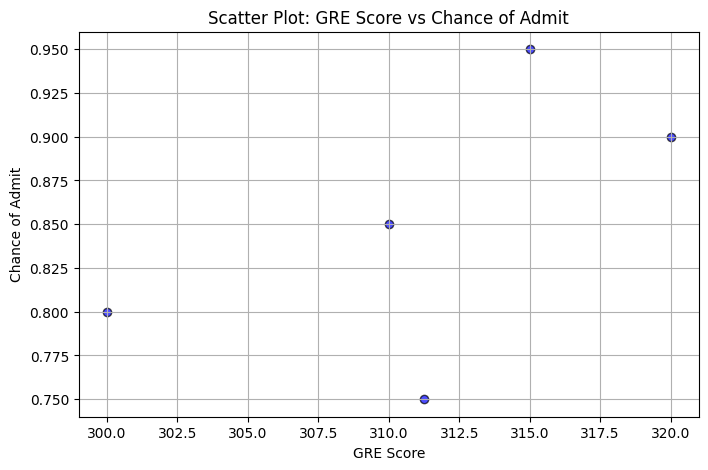

In [12]:
# Draw a scatter plot comparing 'GRE Score' vs 'Chance of Admit'
plt.figure(figsize=(8, 5))
plt.scatter(df['GRE Score'], df['Chance of Admit'],
            alpha=0.7, color='blue', edgecolor='k')
plt.title('Scatter Plot: GRE Score vs Chance of Admit')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit')
plt.grid(True)
plt.show()

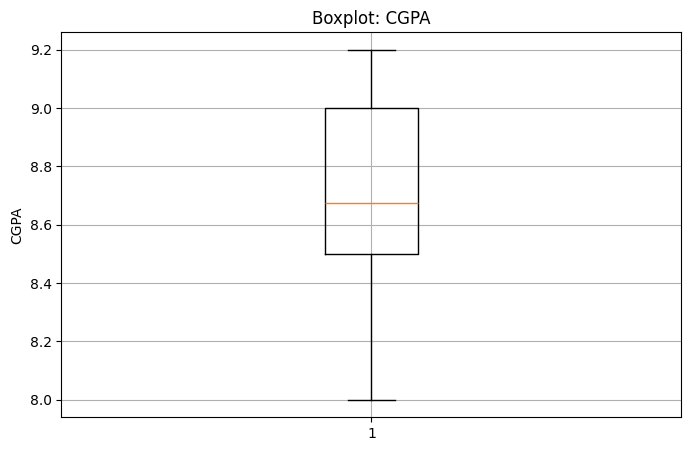

In [13]:
# Draw a boxplot for the 'CGPA' column to show its distribution.
plt.figure(figsize=(8, 5))
plt.boxplot(df['CGPA'])
plt.title('Boxplot: CGPA')
plt.ylabel('CGPA')
plt.grid(True)
plt.show()

**KNNxIRIS**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Scikit-learn imports for splitting, scaling, and modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             accuracy_score, precision_score, recall_score, f1_score)

In [16]:
df = pd.read_csv("/content/iris (3).csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/iris (3).csv'

In [ ]:
# 2. Data Preprocessing and Exploration
print("INFO:\n", df.info())        # Check overall structure and data types
print("\nHEAD:\n", df.head())        # First few rows of the dataset
print("\nTAIL:\n", df.tail())        # Last few rows of the dataset
print("\nMissing values per column:\n", df.isnull().sum())  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
INFO:
 None

HEAD:
    sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0

TAIL:
      sepal_length  sepal_width  petal_length  petal_width  target
145           6.7          3.0           5.2          2.3       2
1

In [ ]:
# Show basic statistics
print("\nDESCRIBE:\n", df.describe())
print("\nDuplicated rows count:", df.duplicated().sum())
print("\nMean values:\n", df.mean())
print("\nMedian values:\n", df.median())
print("\nStandard Deviation:\n", df.std())
print("\nVariance:\n", df.var())
print("\nCorrelation:\n", df.corr())


DESCRIBE:
        sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

Duplicated rows count: 3

Mean values:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64

Median values:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
target          1.00
dtype: float64

Standard Deviation:
 

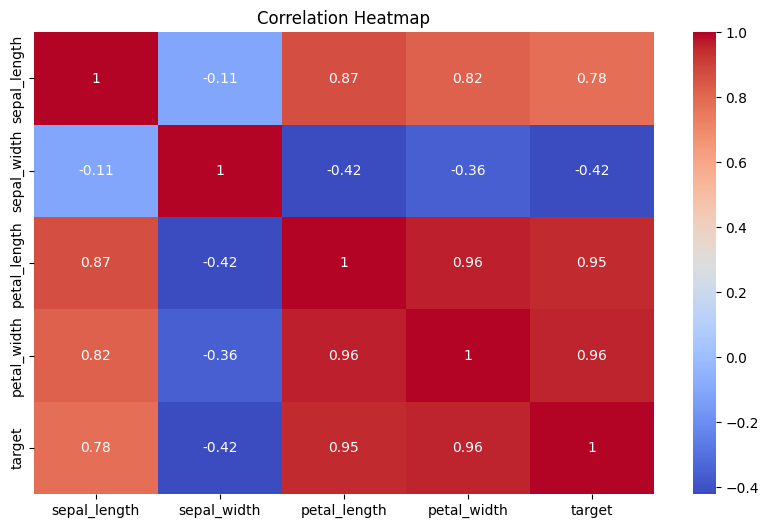

In [ ]:
# Visualize correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


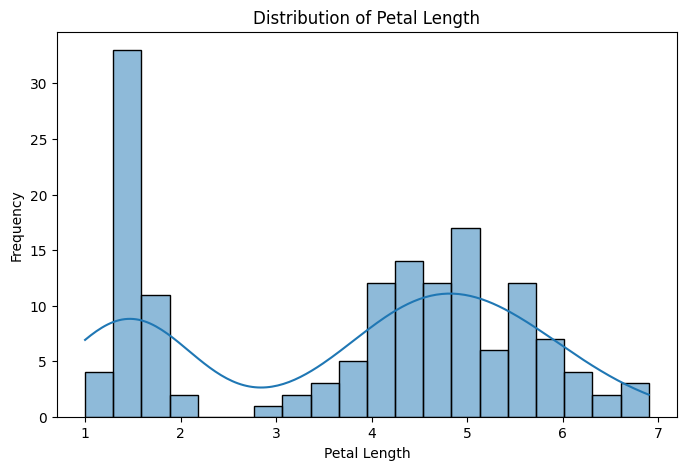

In [ ]:
# Visualize histogram for one numeric column, e.g., petal_length
if 'petal_length' in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["petal_length"], bins=20, kde=True)
    plt.title("Distribution of Petal Length")
    plt.xlabel("Petal Length")
    plt.ylabel("Frequency")
    plt.show()

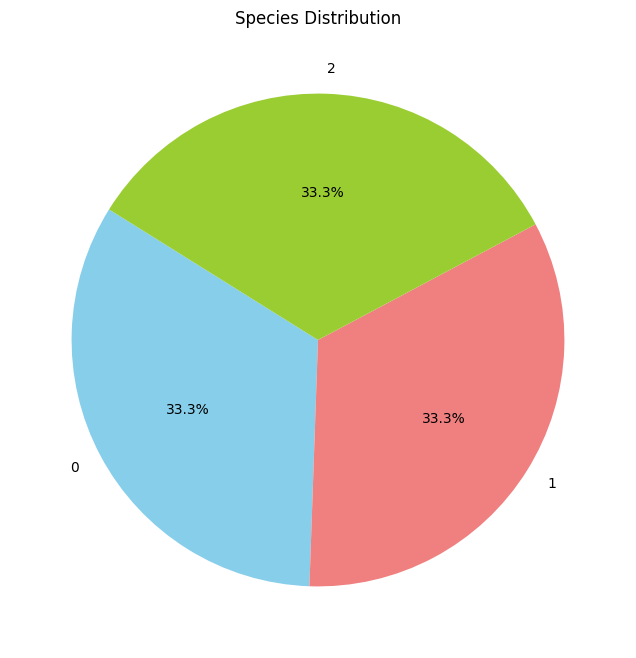

In [ ]:
# Visualize a pie chart of species distribution
plt.figure(figsize=(8,8))
species_counts = df['target'].value_counts()  # assuming column is named 'species'
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=148,
        colors=["skyblue", "lightcoral", "yellowgreen"])
plt.title("Species Distribution")
plt.show()

In [ ]:
# 3. Data Splitting and Preprocessing for Modeling
# For the iris dataset, the target is 'species'
# Encode the target if it is not numeric
if df['target'].dtype == 'object':
    le = LabelEncoder()
    df['target'] = le.fit_transform(df['target'])

In [ ]:
# Features (X) and target (y)
X = df.drop(columns=["target"])
y = df["target"]

In [ ]:
# Split into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardizing the features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# 4b. K-Nearest Neighbors (KNN) Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predictions for KNN
y_pred_knn = knn.predict(X_test)

In [ ]:
# Evaluation for KNN
print("\nKNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN Accuracy: 1.0


In [ ]:
# Cross Validation for KNN
cv_scores_knn = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print("KNN Cross-validation scores:", cv_scores_knn)
print("KNN Mean CV Accuracy:", cv_scores_knn.mean())

KNN Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
KNN Mean CV Accuracy: 0.9733333333333334
